# importing liabraries

In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt 
import missingno as msno
%matplotlib inline

# Data Set

In [42]:
train = pd.read_csv(r'C:\Users\cs\Desktop\Project\vaibhav\Project_3\Music-Recommendation-system-files\train.csv')
test = pd.read_csv(r'C:\Users\cs\Desktop\Project\vaibhav\Project_3\Music-Recommendation-system-files\test.csv')
songs = pd.read_csv(r'C:\Users\cs\Desktop\Project\vaibhav\Project_3\Music-Recommendation-system-files\songs.csv')
members = pd.read_csv(r'C:\Users\cs\Desktop\Project\vaibhav\Project_3\Music-Recommendation-system-files\members.csv')

In [43]:
train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1


In [44]:
songs.head()
#colomn is common in train & songs is song_id

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52


In [45]:
members.head()
#colomn is common in train & members is msno

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613


In [46]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19999 entries, 0 to 19998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   msno                19999 non-null  object
 1   song_id             19999 non-null  object
 2   source_system_tab   19932 non-null  object
 3   source_screen_name  19423 non-null  object
 4   source_type         19949 non-null  object
 5   target              19999 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 546.9+ KB


In [47]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39999 entries, 0 to 39998
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   song_id      39999 non-null  object
 1   song_length  39999 non-null  int64 
 2   genre_ids    39282 non-null  object
 3   artist_name  39999 non-null  object
 4   composer     23203 non-null  object
 5   lyricist     10913 non-null  object
 6   language     39999 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 1.4+ MB


In [48]:
members.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34403 entries, 0 to 34402
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   msno                    34403 non-null  object
 1   city                    34403 non-null  int64 
 2   bd                      34403 non-null  int64 
 3   gender                  14501 non-null  object
 4   registered_via          34403 non-null  int64 
 5   registration_init_time  34403 non-null  int64 
 6   expiration_date         34403 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 1.6+ MB


# Data visualization

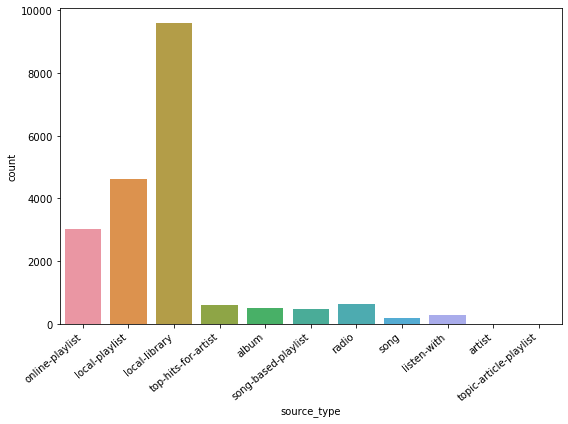

In [49]:
import seaborn as sns
plt.figure(figsize=(8,6))
ax = sns.countplot(x='source_type',data=train)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
plt.tight_layout()
plt.show()
#here we have 2k plus users of online-playlist and more than 9k user are uses local library &less in radio and album and etc

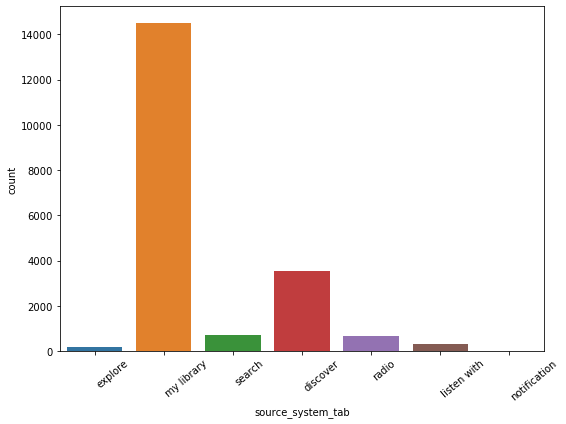

In [50]:

import seaborn as sns
plt.figure(figsize=(8,6))
ax = sns.countplot(x='source_system_tab',data=train)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='left')
plt.tight_layout()
plt.show()
#here we have 2k plus users of online-playlist and more than 9k user are uses local library &less in radio and album and etc

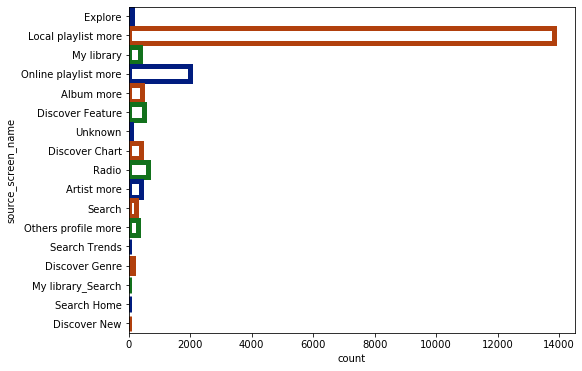

In [51]:
plt.figure(figsize=(8,6))
ax=sns.countplot(y=train['source_screen_name'], data=train, facecolor=(0,0,0,0), linewidth=5,
                edgecolor=sns.color_palette('dark',3))
plt.show()
#Due to facecolor hollow is drawn

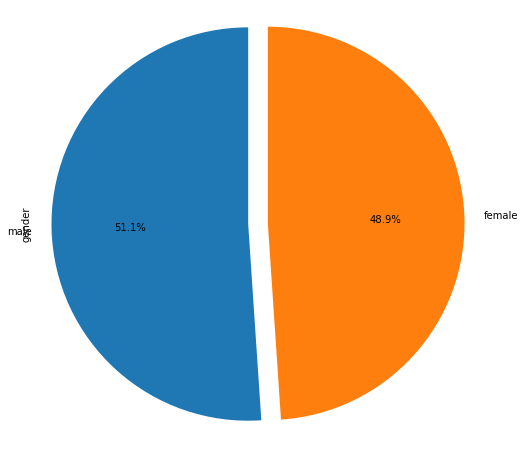

In [52]:
plt.figure(figsize=(8,8))
pp=pd.value_counts(members.gender)
pp.plot.pie(startangle=90, autopct='%1.1f%%', shadow=False, explode=(0.05,0.05))
plt.axis('equal')
plt.show()

# Merge Datasets 

In [53]:
#train set
train_members = pd.merge(train, members, on='msno', how='inner')
train_merged = pd.merge(train_members, songs, on='song_id', how='outer')
print(train_merged.head())
print(len(train_merged.columns))
print('\n')

#test set
test_members = pd.merge(test, members, on='msno', how='inner')
test_merged = pd.merge(test_members, songs, on='song_id', how='outer')
print(test_merged.head())
print(len(test_merged.columns))

                                           msno  \
0  FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=   
1  FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=   
2  FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=   
3  hZyOA+0yqClPLt6uIEndf8fG8szH/95eKMbaxLE5z30=   
4  FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=   

                                        song_id source_system_tab  \
0  BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=           explore   
1  3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=           explore   
2  3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=           explore   
3  3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=          discover   
4  bPIvRTzfHxH5LgHrStll+tYwSQNVV8PySgA3M1PfTgc=           explore   

  source_screen_name      source_type  target  city    bd gender  \
0            Explore  online-playlist     1.0   1.0   0.0    NaN   
1            Explore  online-playlist     1.0   1.0   0.0    NaN   
2            Explore  online-playlist     1.0   1.0   0.0    NaN   
3     

In [54]:
print(train_merged.columns.to_series().groupby(train_merged.dtypes).groups)

{dtype('float64'): Index(['target', 'city', 'bd', 'registered_via', 'registration_init_time',
       'expiration_date', 'song_length', 'language'],
      dtype='object'), dtype('O'): Index(['msno', 'song_id', 'source_system_tab', 'source_screen_name',
       'source_type', 'gender', 'genre_ids', 'artist_name', 'composer',
       'lyricist'],
      dtype='object')}


In [55]:
print(test_merged.columns.to_series().groupby(test_merged.dtypes).groups)

{dtype('float64'): Index(['id', 'city', 'bd', 'registered_via', 'registration_init_time',
       'expiration_date', 'song_length', 'language'],
      dtype='object'), dtype('O'): Index(['msno', 'song_id', 'source_system_tab', 'source_screen_name',
       'source_type', 'gender', 'genre_ids', 'artist_name', 'composer',
       'lyricist'],
      dtype='object')}


In [56]:
#function to check if the missing values are present
def check_missing_values(Df):
    print(Df.isnull().values.any())
    if (Df.isnull().values.any()==True):
        columns_with_Nan = Df.columns[Df.isnull().any()].tolist()
        print(columns_with_Nan)
        for col in columns_with_Nan:
            print('%s : %d' %(col,Df[col].isnull().sum()))
            
check_missing_values(train_merged)

True
['msno', 'source_system_tab', 'source_screen_name', 'source_type', 'target', 'city', 'bd', 'gender', 'registered_via', 'registration_init_time', 'expiration_date', 'song_length', 'genre_ids', 'artist_name', 'composer', 'lyricist', 'language']
msno : 38665
source_system_tab : 38732
source_screen_name : 39241
source_type : 38715
target : 38665
city : 38665
bd : 38665
gender : 46377
registered_via : 38665
registration_init_time : 38665
expiration_date : 38665
song_length : 17154
genre_ids : 17895
artist_name : 17154
composer : 34148
lyricist : 46653
language : 17154


In [57]:
check_missing_values(test_merged)

True
['id', 'msno', 'source_system_tab', 'source_screen_name', 'source_type', 'city', 'bd', 'gender', 'registered_via', 'registration_init_time', 'expiration_date', 'song_length', 'genre_ids', 'artist_name', 'composer', 'lyricist', 'language']
id : 39524
msno : 39524
source_system_tab : 39527
source_screen_name : 39742
source_type : 39526
city : 39524
bd : 39524
gender : 41665
registered_via : 39524
registration_init_time : 39524
expiration_date : 39524
song_length : 4298
genre_ids : 5017
artist_name : 4298
composer : 21113
lyricist : 33461
language : 4298


In [58]:
# Missing values
# Replace float values with -5
def replace_Nan_non_object(Df):
    object_cols=list(Df.select_dtypes(include=['float']).columns)
    for col in object_cols:
        Df[col]=Df[col].fillna(np.int(-5))

replace_Nan_non_object(train_merged)
replace_Nan_non_object(test_merged)

In [59]:
# Missing values of object type

def replace_Nan_object(Df):
    object_cols=list(Df.select_dtypes(include=['object']).columns)
    for col in object_cols:
        Df[col]=Df[col].fillna(' ')
    print(object_cols)

replace_Nan_object(train_merged)
replace_Nan_object(test_merged)

['msno', 'song_id', 'source_system_tab', 'source_screen_name', 'source_type', 'gender', 'genre_ids', 'artist_name', 'composer', 'lyricist']
['msno', 'song_id', 'source_system_tab', 'source_screen_name', 'source_type', 'gender', 'genre_ids', 'artist_name', 'composer', 'lyricist']


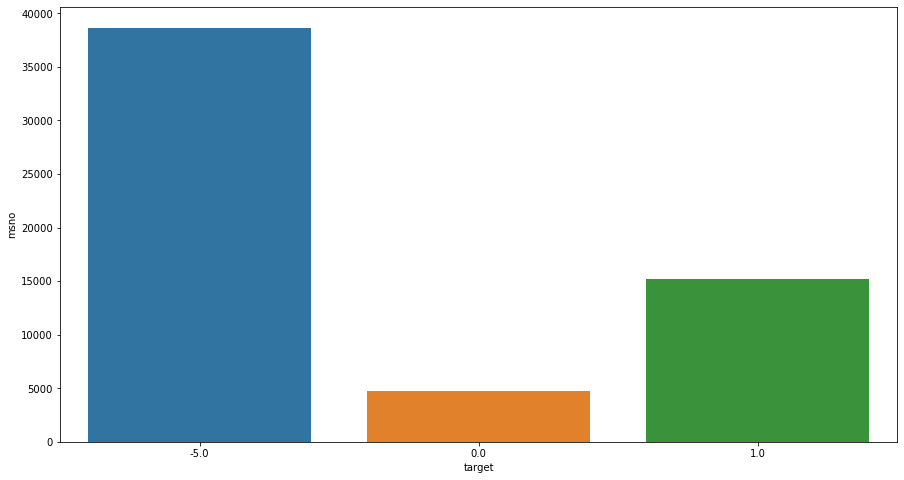

In [60]:
data = train_merged.groupby('target').aggregate({'msno':'count'}).reset_index()
a4_dims=(15,8)
fig,ax=plt.subplots(figsize=a4_dims)
ax = sns.barplot(x='target', y='msno', data=data)

In [61]:
train_merged = train_merged[train_merged.target != -5]
len(train_merged.index)

19999

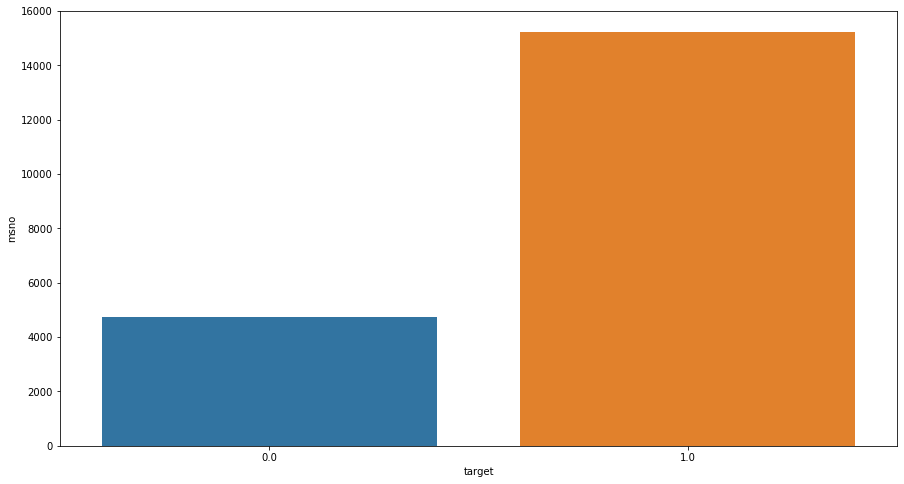

In [62]:
data = train_merged.groupby('target').aggregate({'msno':'count'}).reset_index()
a4_dims=(15,8)
fig,ax=plt.subplots(figsize=a4_dims)
ax = sns.barplot(x='target', y='msno', data=data)
# zero means new user and one means existing user

[Text(0, 0, '-5.0'),
 Text(0, 0, '-1.0'),
 Text(0, 0, '3.0'),
 Text(0, 0, '10.0'),
 Text(0, 0, '17.0'),
 Text(0, 0, '24.0'),
 Text(0, 0, '31.0'),
 Text(0, 0, '52.0'),
 Text(0, 0, '59.0')]

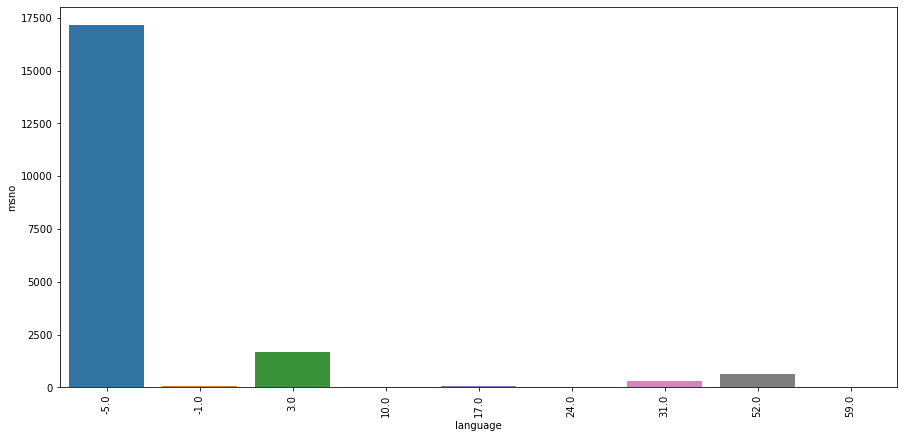

In [63]:
data = train_merged.groupby('language').aggregate({'msno':'count'}).reset_index()
a4_dims=(15,7)
fig, ax= plt.subplots(figsize=a4_dims)
ax = sns.barplot(x='language', y='msno', data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
# itni languages me log song sunte hai same song

[Text(0, 0, '1.0'),
 Text(0, 0, '3.0'),
 Text(0, 0, '4.0'),
 Text(0, 0, '5.0'),
 Text(0, 0, '6.0'),
 Text(0, 0, '7.0'),
 Text(0, 0, '8.0'),
 Text(0, 0, '9.0'),
 Text(0, 0, '10.0'),
 Text(0, 0, '11.0'),
 Text(0, 0, '12.0'),
 Text(0, 0, '13.0'),
 Text(0, 0, '14.0'),
 Text(0, 0, '15.0'),
 Text(0, 0, '16.0'),
 Text(0, 0, '17.0'),
 Text(0, 0, '18.0'),
 Text(0, 0, '20.0'),
 Text(0, 0, '21.0'),
 Text(0, 0, '22.0')]

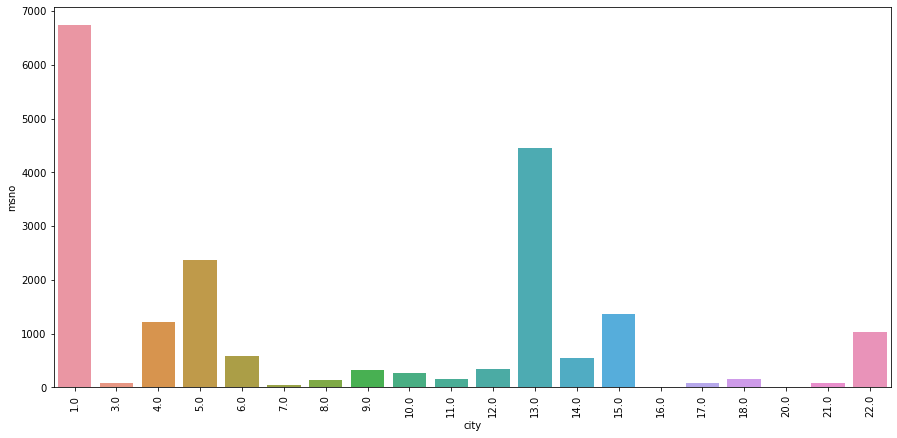

In [64]:
data = train_merged.groupby('city').aggregate({'msno':'count'}).reset_index()
a4_dims=(15,7)
fig, ax= plt.subplots(figsize=a4_dims)
ax = sns.barplot(x='city', y='msno', data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
#city_id me more than 6k users hai jo song sunte hai

# Model buildings

In [65]:
import warnings
warnings.filterwarnings('ignore')

In [66]:
# tarin wale dataset ko hi humne df karke firse load karaya hai and ab all 3 data set ko merge karenge(df, songs and members ko)
df = pd.read_csv(r'C:\Users\cs\Desktop\Project\vaibhav\Project_3\Music-Recommendation-system-files\train.csv')
df = df.sample(frac = 0.1)
songs = pd.read_csv(r'C:\Users\cs\Desktop\Project\vaibhav\Project_3\Music-Recommendation-system-files\songs.csv')
members = pd.read_csv(r'C:\Users\cs\Desktop\Project\vaibhav\Project_3\Music-Recommendation-system-files\members.csv')

In [67]:
# Merge above given all 3 Datasets aur songs and members wale dataset ko delete kar diya
df = pd.merge(df, songs, on='song_id', how='left')
df = pd.merge(df, members, on='msno', how='left')

del songs
del members

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   msno                    2000 non-null   object 
 1   song_id                 2000 non-null   object 
 2   source_system_tab       1994 non-null   object 
 3   source_screen_name      1949 non-null   object 
 4   source_type             1997 non-null   object 
 5   target                  2000 non-null   int64  
 6   song_length             268 non-null    float64
 7   genre_ids               262 non-null    object 
 8   artist_name             268 non-null    object 
 9   composer                212 non-null    object 
 10  lyricist                158 non-null    object 
 11  language                268 non-null    float64
 12  city                    2000 non-null   int64  
 13  bd                      2000 non-null   int64  
 14  gender                  1212 non-null   

In [69]:
df.isnull().sum()/df.isnull().count()*100
#isme kuch columns me hi missing values ka percentage unke aage diya hua hai jaise language me 85.40 % missing values hai

msno                       0.00
song_id                    0.00
source_system_tab          0.30
source_screen_name         2.55
source_type                0.15
target                     0.00
song_length               86.60
genre_ids                 86.90
artist_name               86.60
composer                  89.40
lyricist                  92.10
language                  86.60
city                       0.00
bd                         0.00
gender                    39.40
registered_via             0.00
registration_init_time     0.00
expiration_date            0.00
dtype: float64

In [70]:
# Replace Missing values
for i in df.select_dtypes(include=['object']).columns:
    df[i][df[i].isnull()]='unknown'
df = df.fillna(value=0)

In [71]:
# Create Data
# Registration time
df.registration_init_time = pd.to_datetime(df.registration_init_time, format='%Y%m%d', errors='ignore')
df['registration_init_time_year'] = df['registration_init_time'].dt.year
df['registration_init_time_month'] = df['registration_init_time'].dt.month
df['registration_init_time_day'] = df['registration_init_time'].dt.day

# expiration time
df.expiration_date = pd.to_datetime(df.expiration_date, format='%Y%m%d', errors='ignore')
df['expiration_date_year'] = df['expiration_date'].dt.year
df['expiration_date_month'] = df['expiration_date'].dt.month
df['expiration_date_day'] = df['expiration_date'].dt.day

In [72]:
# Convert Dates column to category type
df['registration_init_time'] = df['registration_init_time'].astype('category')
df['expiration_date'] = df['expiration_date'].astype('category')

In [73]:
# Convert object column to category type
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype('category')

In [74]:
# Encoding all categorical features
for col in df.select_dtypes(include=['category']).columns:
    df[col] = df[col].cat.codes

In [75]:
# Drop few columns
df = df.drop(['expiration_date', 'lyricist'],1)

In [76]:
df.columns

Index(['msno', 'song_id', 'source_system_tab', 'source_screen_name',
       'source_type', 'target', 'song_length', 'genre_ids', 'artist_name',
       'composer', 'language', 'city', 'bd', 'gender', 'registered_via',
       'registration_init_time', 'registration_init_time_year',
       'registration_init_time_month', 'registration_init_time_day',
       'expiration_date_year', 'expiration_date_month', 'expiration_date_day'],
      dtype='object')

In [77]:
# Train_test_split
target = df.pop('target')
from sklearn import model_selection, metrics, ensemble
tarin_data, test_data, train_labels, test_labels = model_selection.train_test_split(df, target, test_size = 0.3)

In [78]:
from sklearn import model_selection, metrics, ensemble
from xgboost.sklearn import XGBclassifier

ModuleNotFoundError: No module named 'xgboost'